<a href="https://colab.research.google.com/github/sagar2582/TensorFlow/blob/main/02_Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification with TensorFlow

## Creating data to view and fit


In [1]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


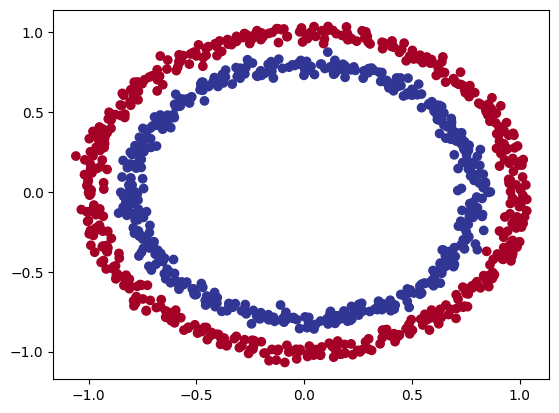

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
## Input and output shapes of our neural networks
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [9]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# Create a model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.9796 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2682 - accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6808 - accuracy: 0.4710
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9299 - accuracy: 0.4840
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 1.2172 - accuracy: 0.5040


In [10]:
# improving our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)

In [11]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Adding an extra layer


In [12]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000


[0.6940680742263794, 0.5]

## Improving our model

In [13]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5100


[0.7004038095474243, 0.5099999904632568]

### Let's create a function to visualize our model.

In [14]:
from numpy.core.fromnumeric import shape
import numpy as np

def plot_decision_boundry(model, X, y):
  '''
  Plots the decision boundary created by a model predicting on X.
  '''
  # Define the  axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
               
  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predcitions to get them ready for plotting 
    y_pred = np.argsmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing binary classification


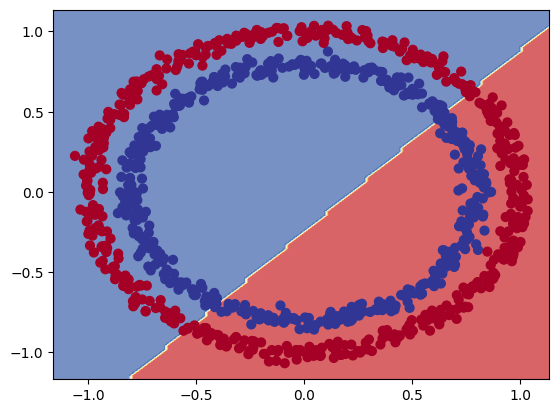

In [15]:
# Check out the predictions our model is making 
plot_decision_boundry(model=model_3,
                      X=X,
                      y=y)

In [16]:
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

## The missing piece : Non-linearity

In [17]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.4633 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4409 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4575 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4510 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4462 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4451 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4446 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4441 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4287 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4104 - accuracy: 0.4860
Epoch 11/

In [18]:
# Time to replicate the multilayer neural network from TensorFlow playgrounds

# Set the random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.7548 - accuracy: 0.4410
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2142 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8469 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.0126 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.4530
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8272 - accuracy: 0.4380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.4200
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7898 - accuracy: 0.4080
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7784 - accuracy: 0.4120
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7694 - accuracy: 0.4240
Epoch 11/

In [19]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7910


[0.5074963569641113, 0.7910000085830688]

313/313 [==============================] - 0s 1ms/step
doing binary classification


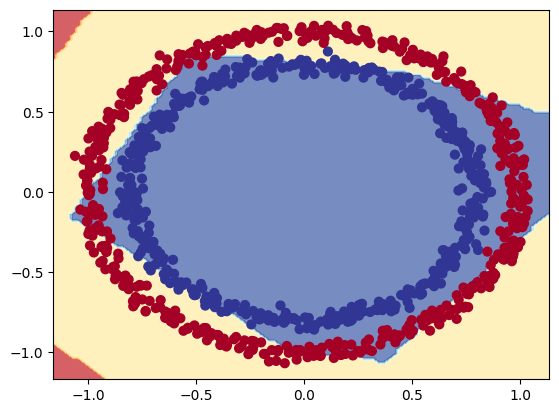

In [20]:
plot_decision_boundry(model_5, X, y)

In [21]:
# Changing/adding the activation in the output layer
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")      # Sigmoid for Binary Classification, softmax is used for multi-class classification
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5070
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5080
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5100
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5110
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5080
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5100
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5140
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5200
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5180
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


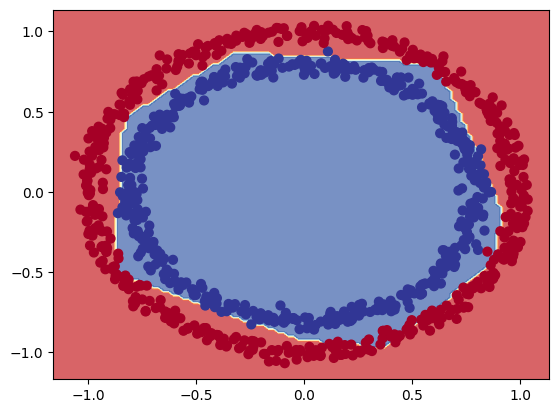

In [22]:
plot_decision_boundry(model_6, X, y)

In [23]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9700


[0.23466315865516663, 0.9700000286102295]

Are we evaluating our model correctly?

In [24]:
# Create a toy tensor (similar to the data we passed into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

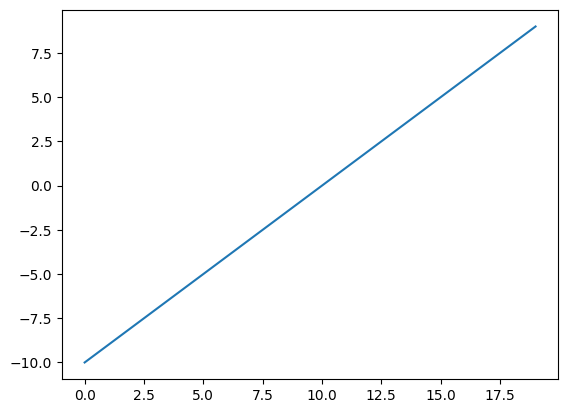

In [25]:
# Visualize our toy tensor
plt.plot(A);

In [26]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sogmoid on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

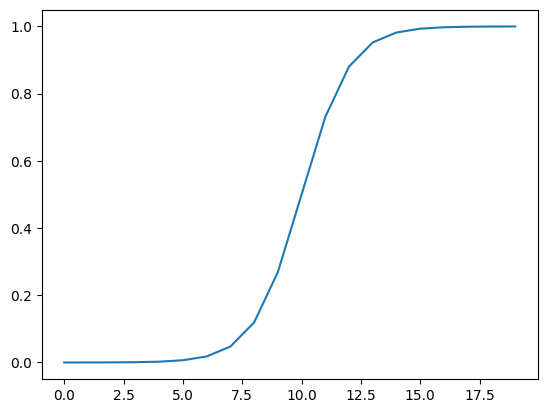

In [27]:
plt.plot(sigmoid(A));

In [28]:
# Build a ReLu function
def relu(x):
  return tf.maximum(0, x)

# passing toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

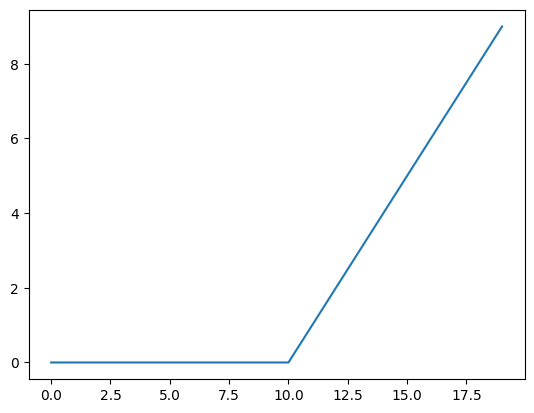

In [29]:
plt.plot(relu(A));

## Evaluating and improving our classification model

Let's create training and test sets


In [30]:
len(X)

1000

In [31]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [32]:
# Let recreate a mdel on the training data and evaulate on the test sets

# Set the random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model 
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5300
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5260
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6550
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7070
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7300
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7360
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7620
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8610
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.9160
Epoch 11/

In [33]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9930


[0.030747126787900925, 0.9929999709129333]

313/313 [==============================] - 0s 1ms/step
doing binary classification


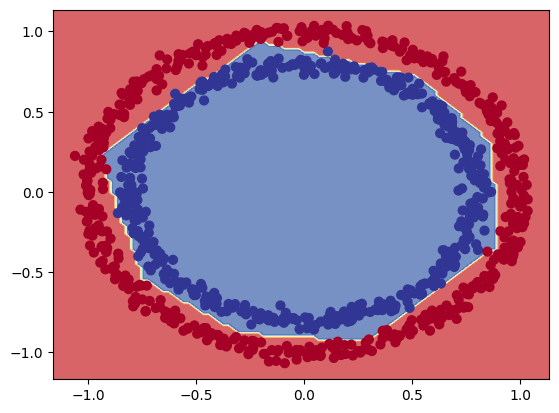

In [34]:
plot_decision_boundry(model_7, X, y)

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


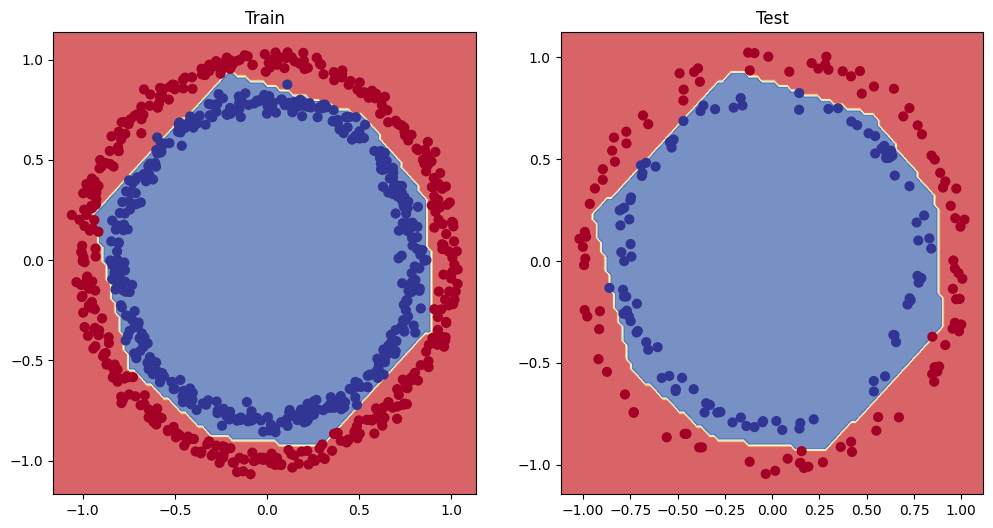

In [35]:
# Checking on the test dataset

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundry(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundry(model_7, X=X_test, y=y_test)
plt.show();

In [36]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9900


[0.033060017973184586, 0.9900000095367432]

## Using TensorFlow History object to plot a model's loss curve

In [37]:
# Convert history object into a DataFrame

pd.DataFrame(history.history)

,loss,accuracy
0,0.694259,0.530
1,0.685394,0.598
2,0.672931,0.526
3,0.659379,0.655
4,0.632335,0.707
...,...,...
95,0.033606,0.990
96,0.032096,0.986
97,0.028915,0.990
98,0.042999,0.978


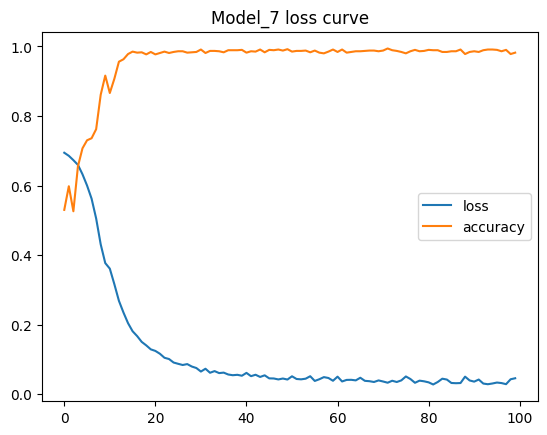

In [38]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curve");

### Using callbacks to find a model's ideal learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* its training.

* A modified loss curves plot.

In [39]:
# Set the random seed'
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# lr-Callback - A callback works during model training, so to run during model training it has to exist before model training.
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_8 = model_8.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7019 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4863 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.4888 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

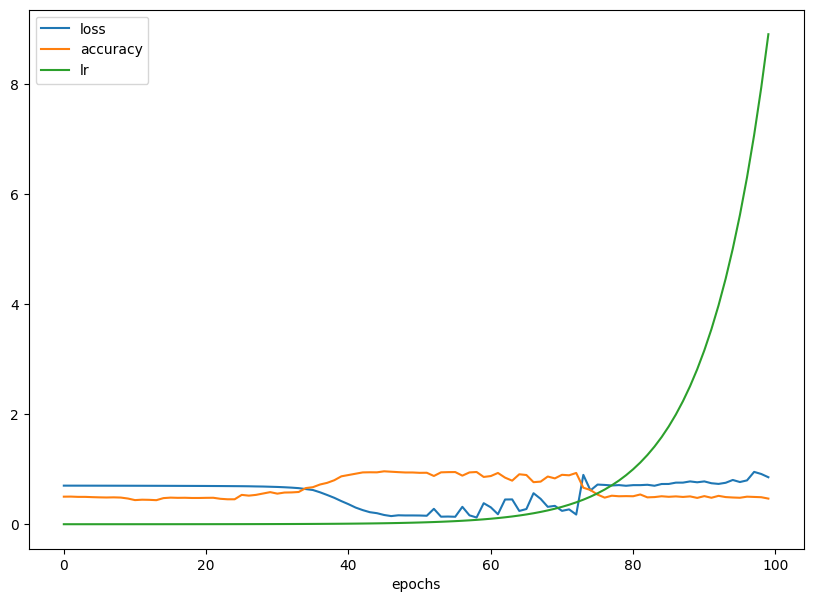

In [40]:
pd.DataFrame(history_8.history).plot(figsize=(10, 7), xlabel = "epochs");

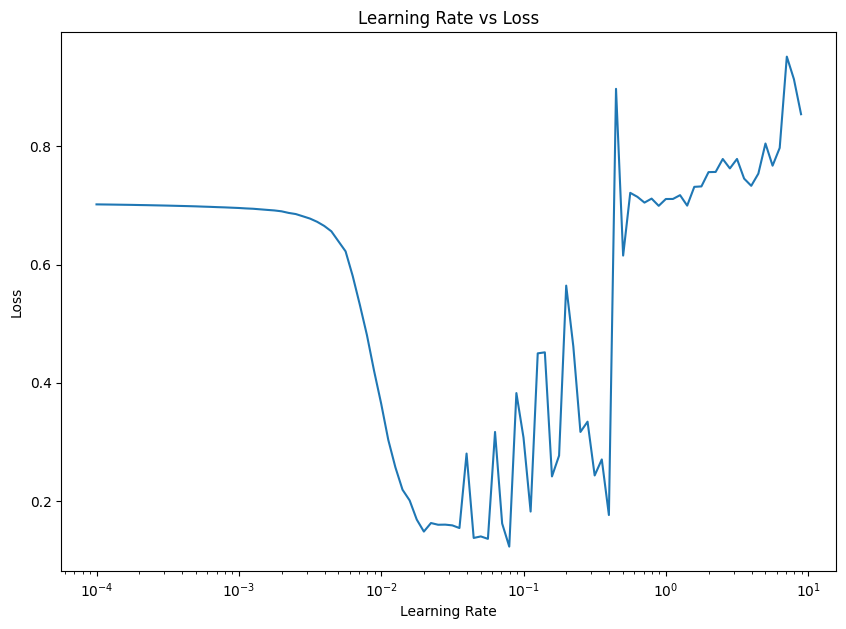

In [41]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
# Semilogx() plot - this just means we want log on the 'x' scale
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [42]:
len(lrs)

100

from keras.api._v2.keras import metrics
## More classification evaluation methods

* Accuracy
* Precison
* Recall
* F1-score
* Confusion metrics
* Classification scikit learn report

## Working with a larger example (multiclass classification)

In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [56]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [57]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

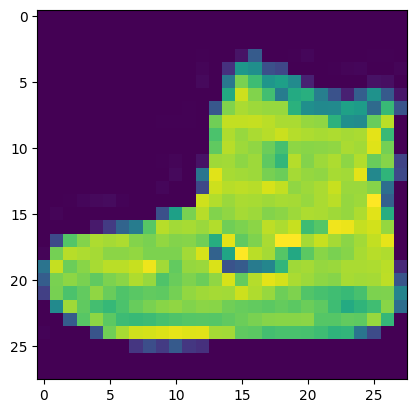

In [58]:
# Plot a single smaple
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [59]:
# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", " Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

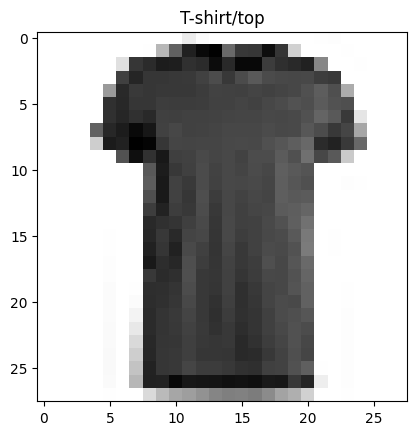

In [60]:
# plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

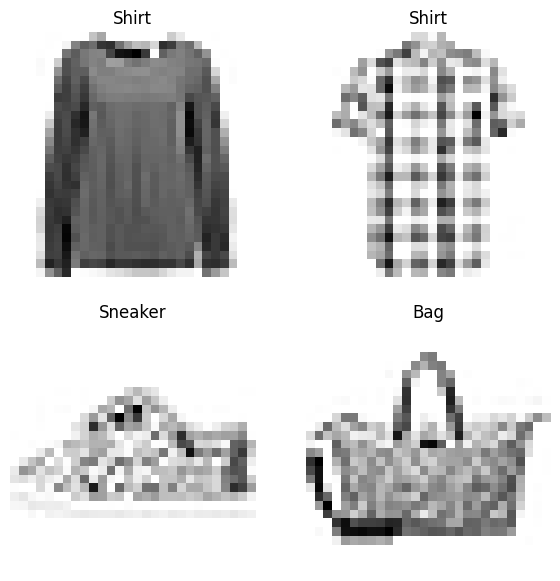

In [61]:
# Plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range (4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False);

## Building a multiclass classification

* if the labels are one-hot encoded use CategoricalCrossentropy, or else use SparceCategoricalCross.

In [62]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_9.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0472 - accuracy: 0.1847 - val_loss: 1.8053 - val_accuracy: 0.2061
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7233 - accuracy: 0.2564 - val_loss: 1.6706 - val_accuracy: 0.2766
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6633 - accuracy: 0.2792 - val_loss: 1.6431 - val_accuracy: 0.2737
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6386 - accuracy: 0.2853 - val_loss: 1.6298 - val_accuracy: 0.2993
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6244 - accuracy: 0.2940 - val_loss: 1.6545 - val_accuracy: 0.2835
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6097 - accuracy: 0.3043 - val_loss: 1.6211 - val_accuracy: 0.2805
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5989 - accuracy: 0.3104 - val_loss: 1.5921 - val_accuracy

In [63]:
# Check the model summary
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 4)                 3140      
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Check the mix and max values of the train data
train_data.min(), train_data.max()

(0, 255)

* Neural network prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns  between 0 - 1.

In [65]:
# We can  get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [66]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

### Now our data is normalized

In [67]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_9.fit(train_data_norm,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0597 - accuracy: 0.6305 - val_loss: 0.7170 - val_accuracy: 0.7479
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6501 - accuracy: 0.7717 - val_loss: 0.6613 - val_accuracy: 0.7718
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6004 - accuracy: 0.7911 - val_loss: 0.6156 - val_accuracy: 0.7912
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5744 - accuracy: 0.8034 - val_loss: 0.5999 - val_accuracy: 0.7950
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5591 - accuracy: 0.8096 - val_loss: 0.5970 - val_accuracy: 0.7952
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5478 - accuracy: 0.8129 - val_loss: 0.6048 - val_accuracy: 0.7910
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5386 - accuracy: 0.8161 - val_loss: 0.5732 - val_accuracy:

* Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).